# 📊 Customer Churn Prediction Using Machine Learning

**Name:** Nikhil Subhash Vishwakarma  
**College:** KES Shroff College  
**Course:** BSc Data Science  
**Project Type:** Academic Major Project  

---

## 📝 Objective:
To predict whether a customer will churn (leave the service) using demographic and usage data. We will apply machine learning models and analyze feature importance to guide business decisions.



## ✅ Conclusion

- We used Logistic Regression and Random Forest to predict customer churn.
- Random Forest performed better in accuracy and recall.
- Features like `Contract`, `MonthlyCharges`, and `tenure` were most influential.
- This model can help telecom companies reduce churn and improve customer retention.


## 📌 Future Improvements:
- Add XGBoost or Ensemble models
- Build a web interface using Streamlit or Flask
- Deploy the model using FastAPI


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("C:/Users/NIKHIL/OneDrive/Pictures/Desktop/KES Project 2k25/data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


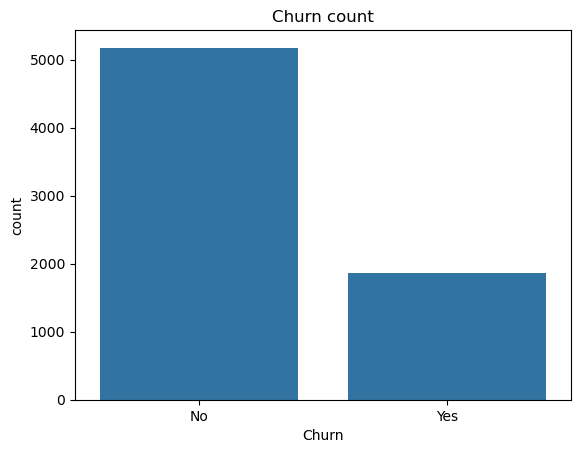

In [3]:


sns.countplot(x='Churn',data=df)
plt.title('Churn count')
plt.show()

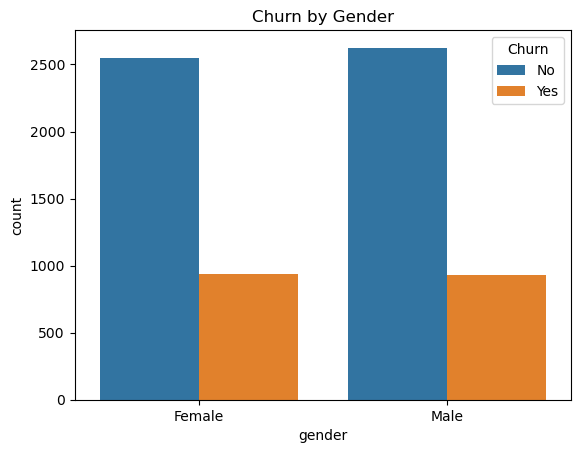

In [4]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

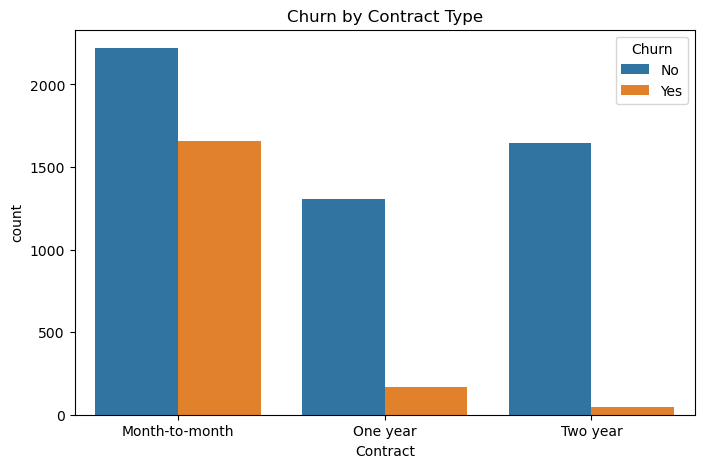

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


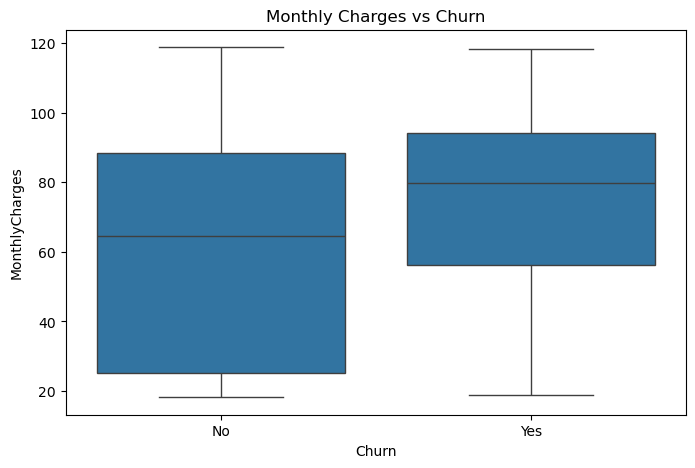

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

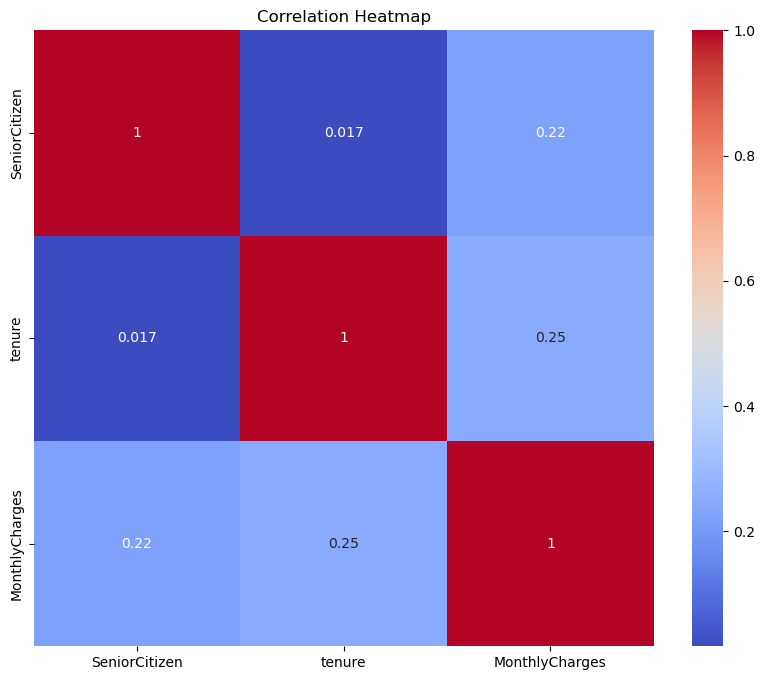

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


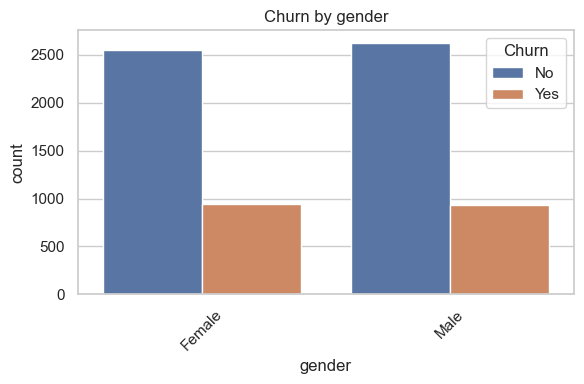

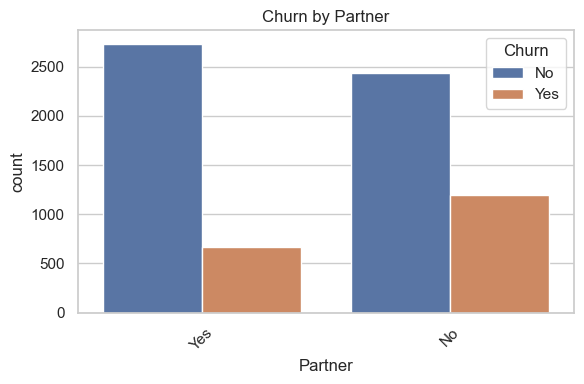

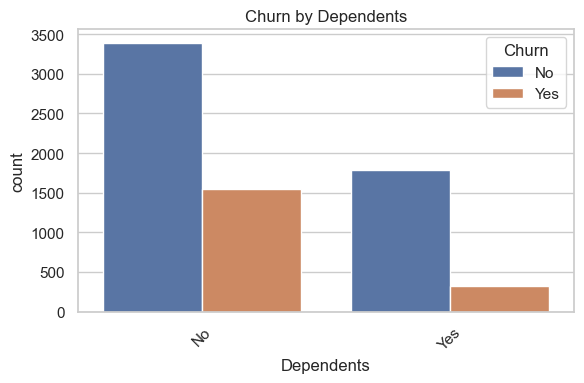

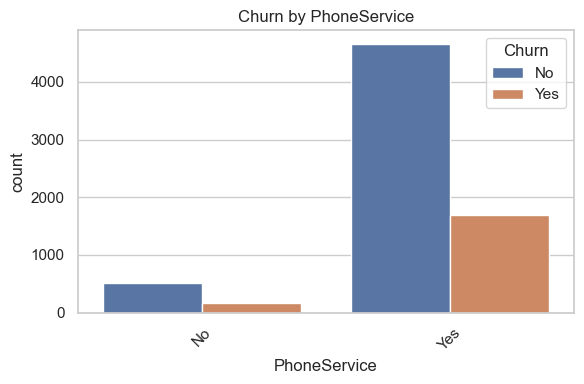

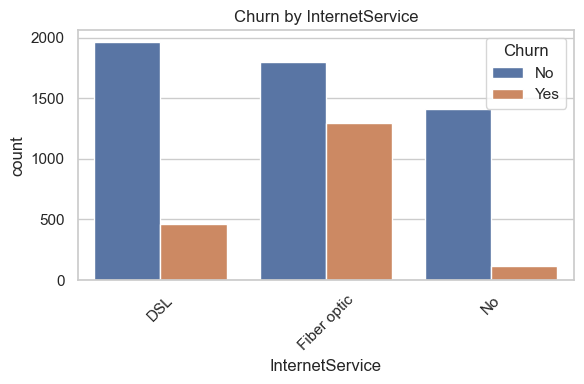

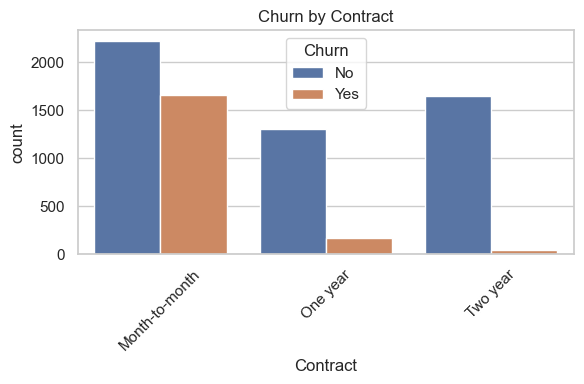

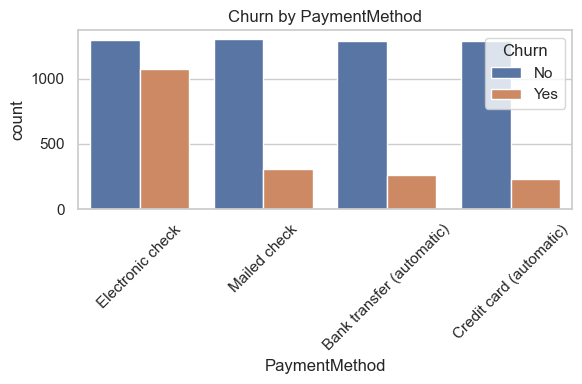

In [8]:
sns.set(style='whitegrid')
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']

for feature in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


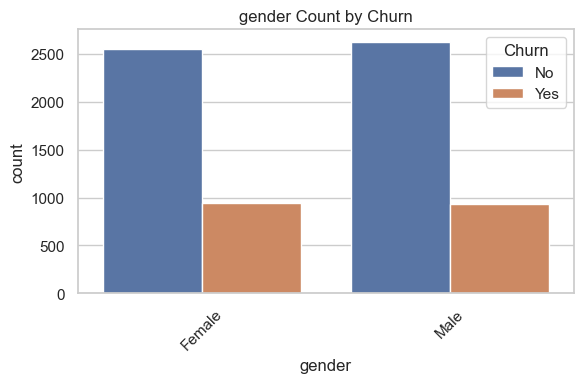

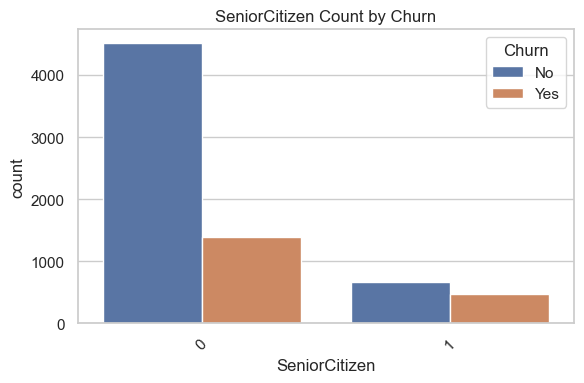

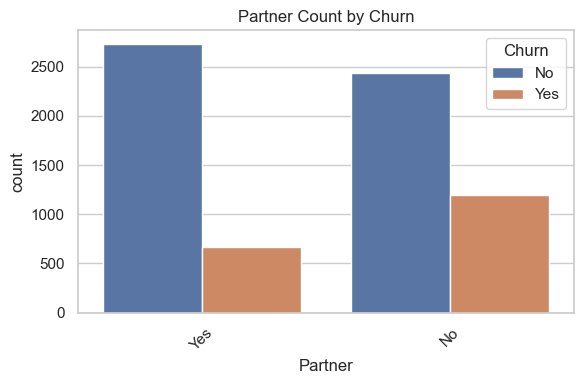

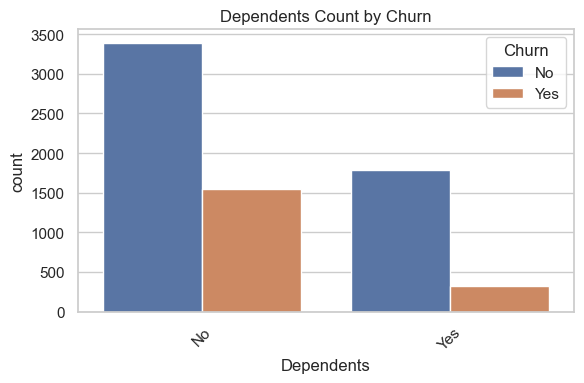

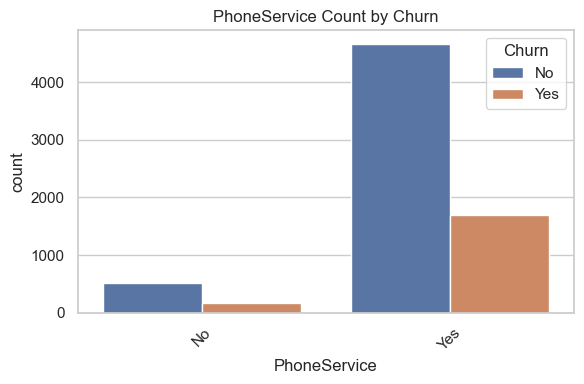

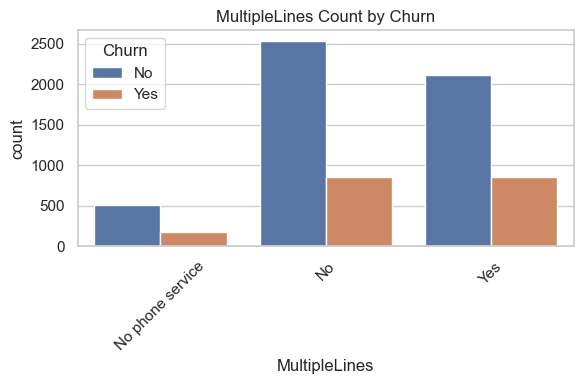

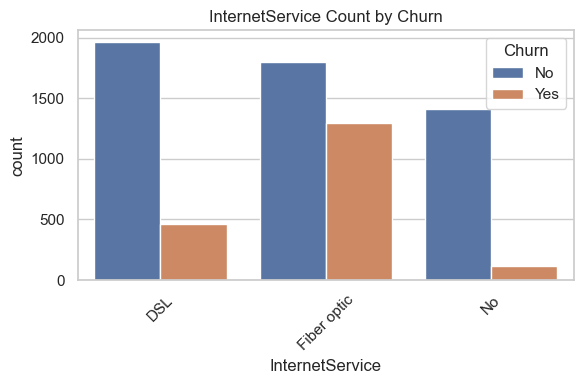

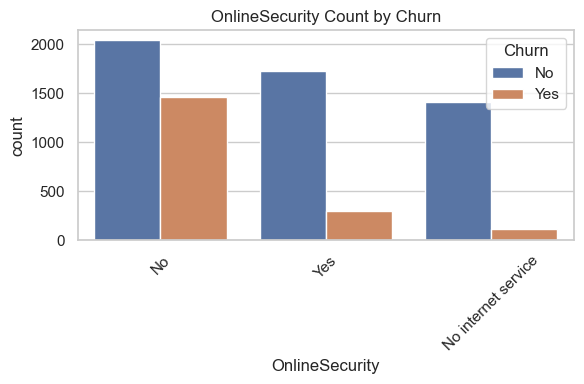

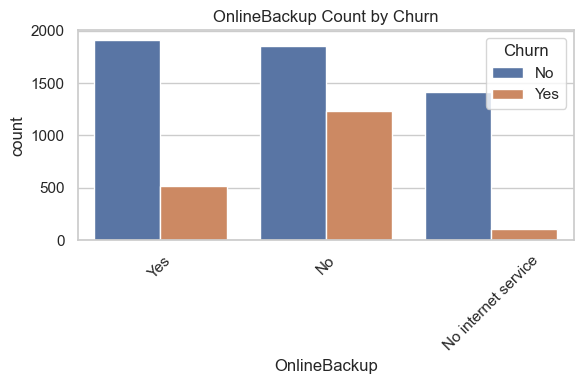

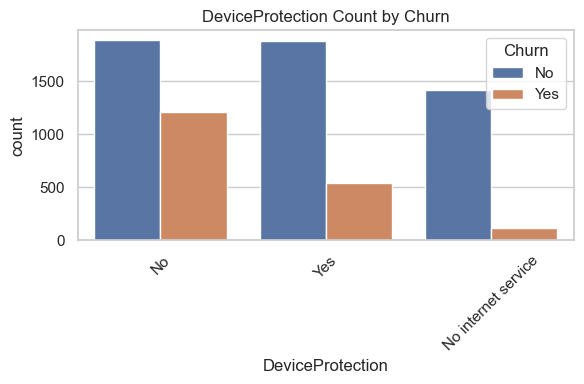

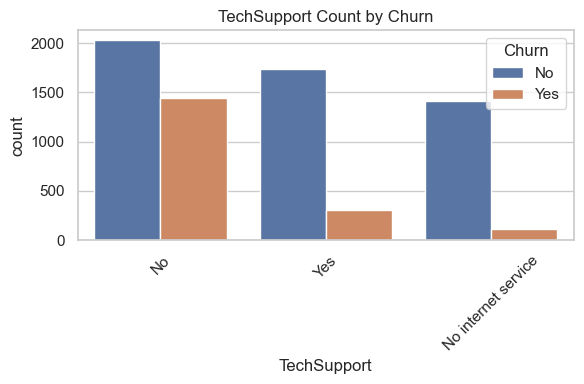

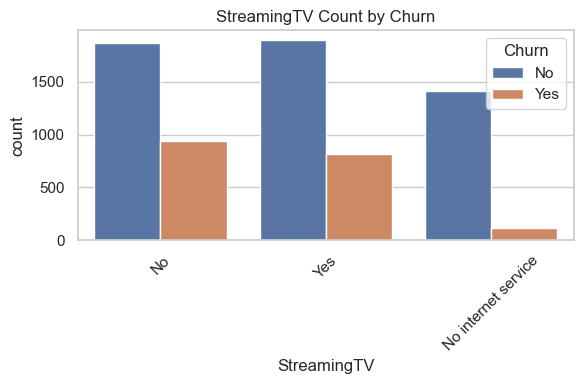

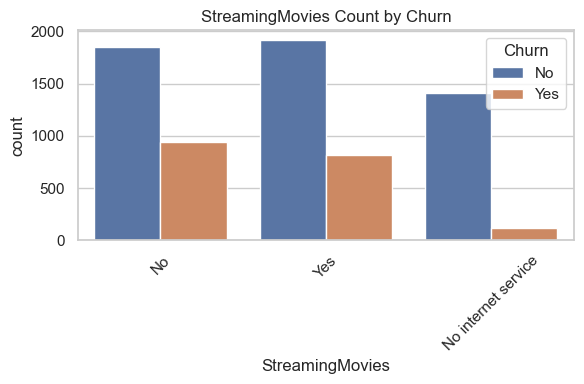

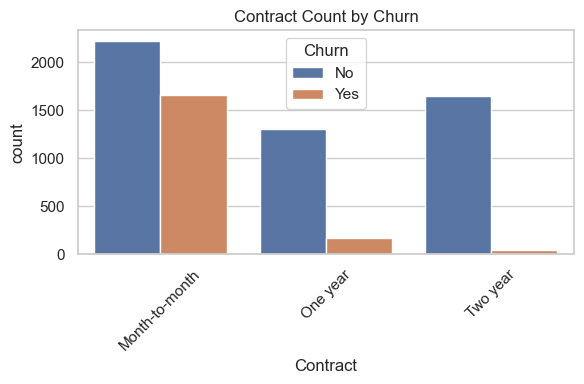

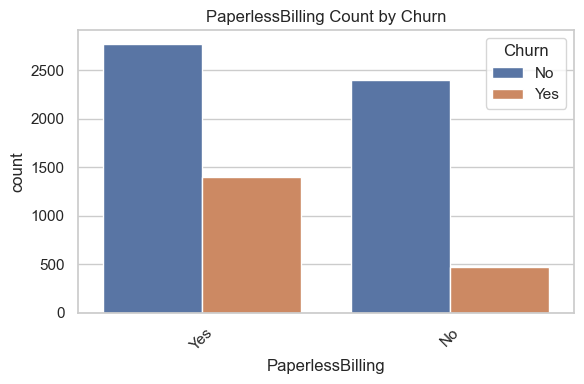

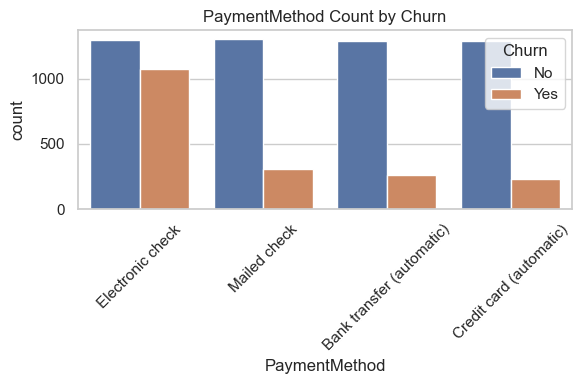

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'{feature} Count by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy of the DataFrame
df_processed = df.copy()

# Drop customerID since it's not useful for prediction
df_processed.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (in case it's still object)
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

# Handle missing values if any
df_processed.dropna(inplace=True)

# Encode categorical columns
cat_cols = df_processed.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

# Scale numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']


In [11]:
display(df_processed.head())
print("\nShape:", df_processed.shape)
print("\nFeatures:\n", df_processed.columns.tolist())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1



Shape: (7032, 20)

Features:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("🔎 Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔎 Accuracy Score: 0.8

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

🧮 Confusion Matrix:
 [[1375  174]
 [ 248  313]]


In [13]:
import numpy as np
print(np.__version__)

1.26.4


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

✅ Random Forest Accuracy: 0.7843601895734598

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

🧮 Confusion Matrix:
 [[1386  163]
 [ 292  269]]


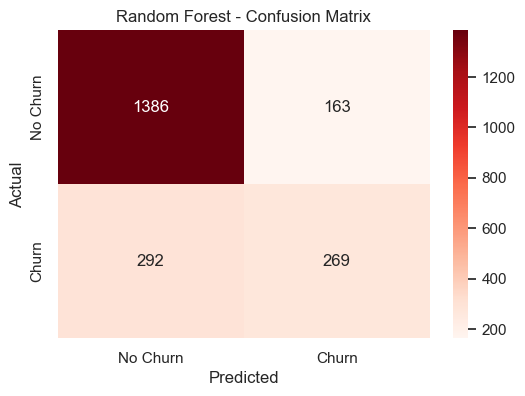

In [15]:
#A confusion matrix helps explain how well your model is predicting churn vs non-churn.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

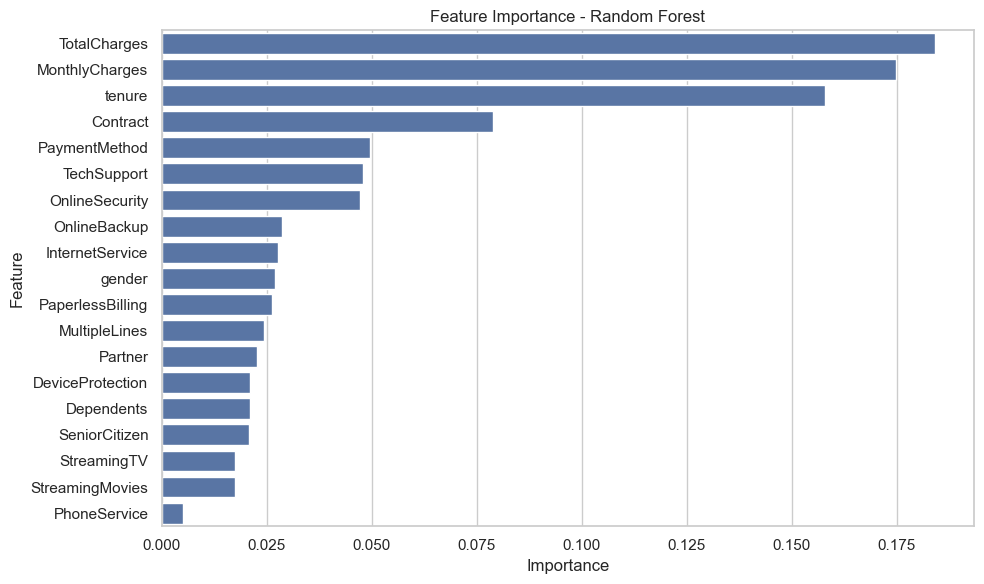

In [16]:
#This tells you which features are most responsible for predicting churn.
import pandas as pd

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [17]:
results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred_rf
results_df.to_csv('churn_predictions.csv', index=False)


In [18]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']

In [19]:
import os
print(os.getcwd())


C:\Users\NIKHIL


In [21]:
import joblib

# Load the saved model
rf = joblib.load('random_forest_model.pkl')

In [25]:
#Logistic Regression & Gradient Boosting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_proba)

# Train Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_proba = gb.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, gb_proba)

# Random Forest already trained
rf_proba = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_proba)

# Compare AUCs
print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Gradient Boosting AUC: {gb_auc:.4f}")


Logistic Regression AUC: 0.8354
Random Forest AUC: 0.8167
Gradient Boosting AUC: 0.8376


In [25]:
#Logistic Regression & Gradient Boosting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]
lr_auc = roc_auc_score(y_test, lr_proba)

# Train Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_proba = gb.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, gb_proba)

# Random Forest already trained
rf_proba = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_proba)

# Compare AUCs
print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Gradient Boosting AUC: {gb_auc:.4f}")


Logistic Regression AUC: 0.8354
Random Forest AUC: 0.8167
Gradient Boosting AUC: 0.8376


Accuracy: 0.7843601895734598


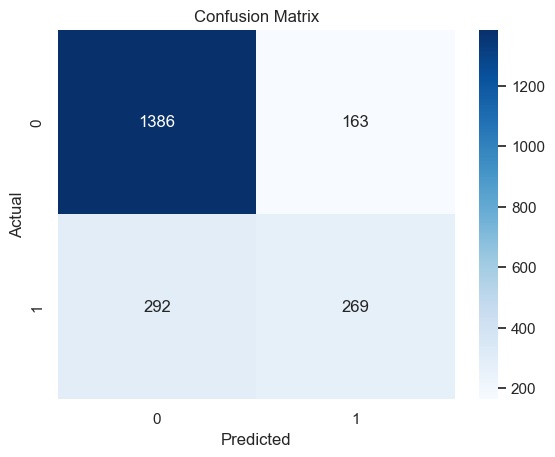

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



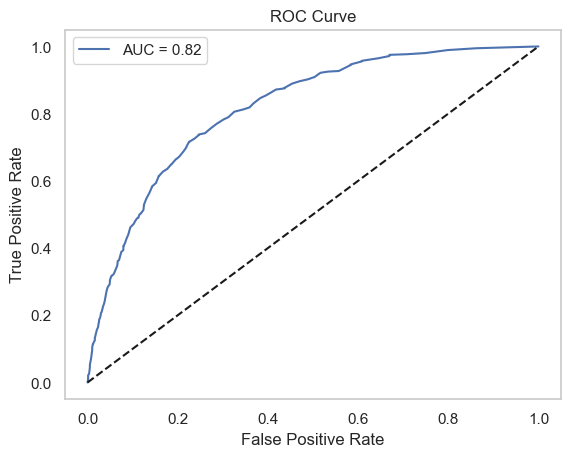

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make predictions
y_pred = rf.predict(X_test)

# Step 2: Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 4: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: ROC Curve and AUC
y_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


### Model Comparison – Logistic vs RF vs Gradient Boosting



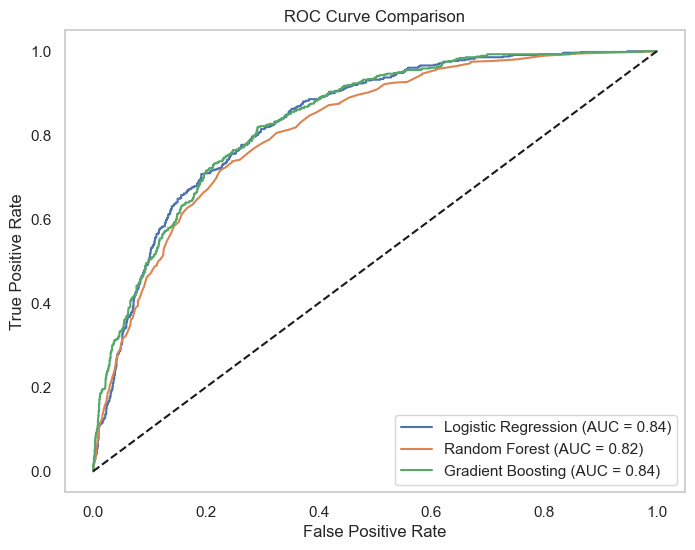

In [29]:
from sklearn.metrics import roc_curve

# ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_proba)

plt.figure(figsize=(8,6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

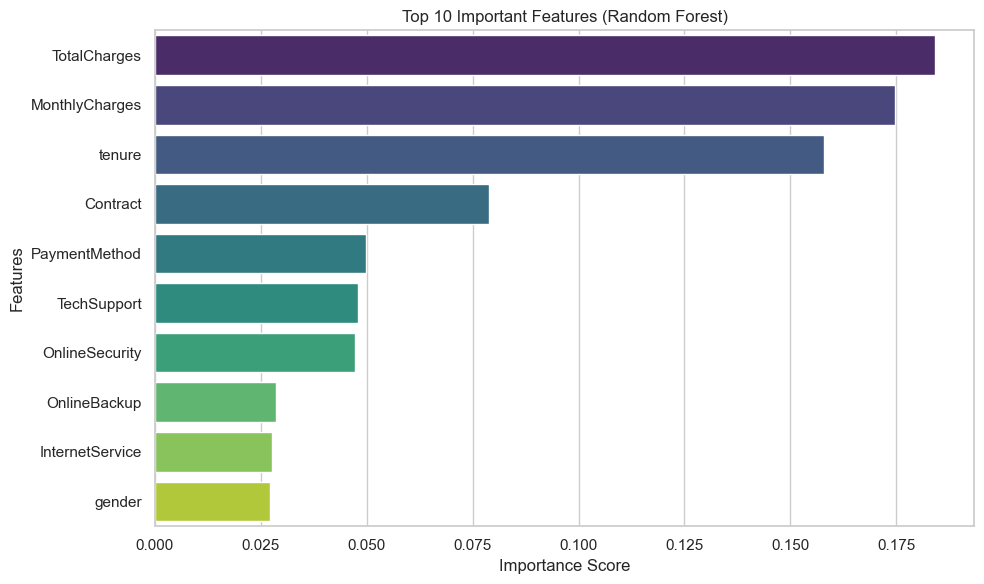

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from Random Forest
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances = rf_importances.sort_values(ascending=False)

# Plot Top 10
plt.figure(figsize=(10,6))
sns.barplot(
    x=rf_importances[:10],
    y=rf_importances.index[:10],
    hue=rf_importances.index[:10],  # assign hue to match y
    palette='viridis',
    legend=False  # no need of legend
)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


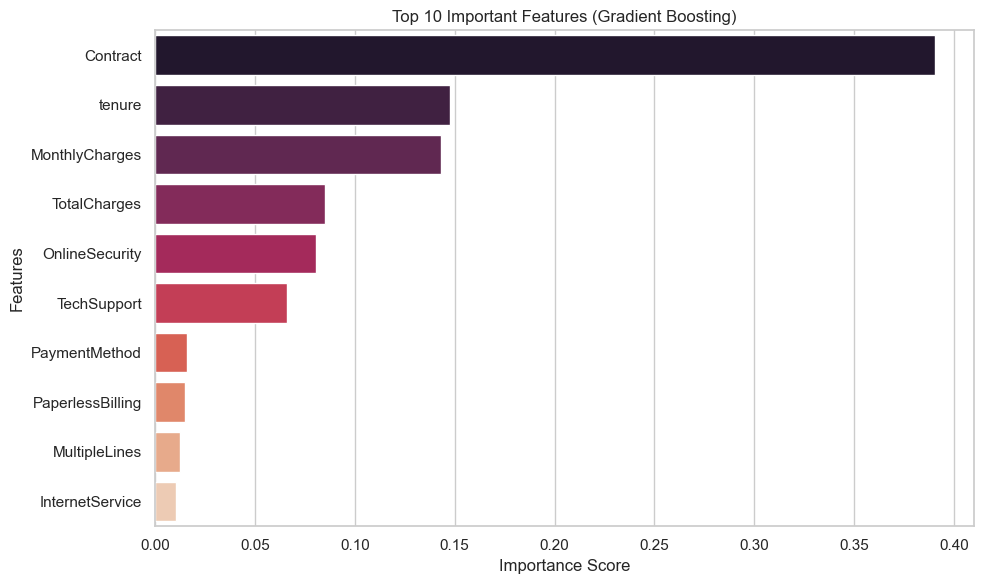

In [33]:
gb_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
gb_importances = gb_importances.sort_values(ascending=False)

# Plot Top 10
plt.figure(figsize=(10,6))
sns.barplot(
    x=gb_importances[:10],
    y=gb_importances.index[:10],
    hue=gb_importances.index[:10],
    palette='rocket',
    legend=False
)
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [34]:
#Fold Cross-Validation for All Models
from sklearn.model_selection import cross_val_score

# 5-Fold CV for Logistic Regression
lr_cv = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression CV AUC: {lr_cv.mean():.4f} ± {lr_cv.std():.4f}")

# 5-Fold CV for Random Forest
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest CV AUC: {rf_cv.mean():.4f} ± {rf_cv.std():.4f}")

# 5-Fold CV for Gradient Boosting
gb_cv = cross_val_score(gb, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Gradient Boosting CV AUC: {gb_cv.mean():.4f} ± {gb_cv.std():.4f}")


Logistic Regression CV AUC: 0.8475 ± 0.0150
Random Forest CV AUC: 0.8268 ± 0.0176
Gradient Boosting CV AUC: 0.8473 ± 0.0150


In [35]:
from sklearn.metrics import accuracy_score

# Get predictions again (if not already done)
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# Create summary
model_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, gb_pred)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])
    ],
    'CV AUC (Mean)': [
        lr_cv.mean(),
        rf_cv.mean(),
        gb_cv.mean()
    ],
    'CV AUC (Std)': [
        lr_cv.std(),
        rf_cv.std(),
        gb_cv.std()
    ]
})

# Display the table
print(model_summary)

                 Model  Accuracy   ROC-AUC  CV AUC (Mean)  CV AUC (Std)
0  Logistic Regression  0.800000  0.835376       0.847461      0.015019
1        Random Forest  0.784360  0.816721       0.826765      0.017598
2    Gradient Boosting  0.795261  0.837560       0.847262      0.014959


In [36]:
# Load model
import joblib
model = joblib.load("random_forest_model.pkl")
